# SUNKARI LAKSHMIPRIYA
slakshmipriya0712@gmail.com

# LOAN ELIGIBILITY PREDICTION USING IBM WATSON STUDIO

# Importing the libraries

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading the dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_452827156be9435c8f46aa96d0bb0d52 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_452827156be9435c8f46aa96d0bb0d52 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_452827156be9435c8f46aa96d0bb0d52 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0ypDVvIkg-PNu96oqIph_8TKmSdNcz-NDqHkk41hmWnx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_452827156be9435c8f46aa96d0bb0d52)

body = client_452827156be9435c8f46aa96d0bb0d52.get_object(Bucket='mineloanprediction-donotdelete-pr-hoyishiuksh4cv',Key='credit_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
#finding the number of rows and columns
dataset.shape

(100514, 19)

In [4]:
#lists out the names of the columns 
dataset.columns   

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [5]:
# It will display the first five rows of the dataset
dataset.head()    

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Null Values

In [6]:
#lists the  null values in every column of the dataset
dataset.isnull().any()

Loan ID                         True
Customer ID                     True
Loan Status                     True
Current Loan Amount             True
Term                            True
Credit Score                    True
Annual Income                   True
Years in current job            True
Home Ownership                  True
Purpose                         True
Monthly Debt                    True
Years of Credit History         True
Months since last delinquent    True
Number of Open Accounts         True
Number of Credit Problems       True
Current Credit Balance          True
Maximum Open Credit             True
Bankruptcies                    True
Tax Liens                       True
dtype: bool

In [7]:
#Finding the  sum of null values in every column of the dataset
dataset.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

# Categorical Columns

In [8]:
#lists the columns with categorical data
object_train_df=dataset.select_dtypes(include=['object'])    
object_train_df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')

# Numerical Columns

In [9]:
#lists the columns with numerical data
num_train_df=dataset.select_dtypes(include=['int','float'])     
num_train_df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

# Dropping Loan Status Null Values and Labeling it

In [10]:
dataset.dropna(subset=['Loan Status'], inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
dataset['Loan Status'] = le.fit_transform(dataset['Loan Status'])

In [12]:
dataset

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


# Term column Labeling

In [13]:
dataset['Term'].replace(('Short Term','Long Term'),(0,1),inplace=True)
dataset.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [14]:
dataset.isnull().any()

Loan ID                         False
Customer ID                     False
Loan Status                     False
Current Loan Amount             False
Term                            False
Credit Score                     True
Annual Income                    True
Years in current job             True
Home Ownership                  False
Purpose                         False
Monthly Debt                    False
Years of Credit History         False
Months since last delinquent     True
Number of Open Accounts         False
Number of Credit Problems       False
Current Credit Balance          False
Maximum Open Credit              True
Bankruptcies                     True
Tax Liens                        True
dtype: bool

# Scaling Credit Score Column

In [15]:
#Applying lamda function
dataset['Credit Score'] = dataset['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

# Handling Null values of Credit Score Column

In [16]:
do_nothing = lambda: None
cscoredf = dataset[dataset['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
lscoredf = dataset[dataset['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
dataset.loc[(dataset.Term==0) & (dataset['Credit Score'].isnull()),'Credit Score'] = stermAVG
dataset.loc[(dataset.Term==1) & (dataset['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [17]:
dataset['Credit Score'] = dataset['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
dataset['Credit Score'] = dataset['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
dataset['Credit Score'] = dataset['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
dataset['Credit Score'] = dataset['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
dataset['Credit Score'] = dataset['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

# Analying the data

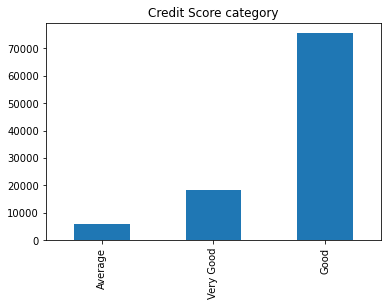

In [18]:
## The graph lists out the counts in an ascending way
dataset['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title = 'Credit Score category')

# Annual income column



In [19]:
# Prints the sum of missing values in the column Annual Income.
print("There are",dataset['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 19154 Missing Annual Income Values.


In [20]:
#by using fillna function we are filling the null values with the mean method inplace where it is true.
dataset['Annual Income'].fillna(dataset['Annual Income'].mean(), inplace=True)

In [21]:
#finding the data shape
dataset.shape

(100000, 19)

In [22]:
#By using the counter function we are to get the count of Good, Very Good and Average.
from collections import Counter as c
print(c(dataset['Credit Score']))  #returns the class count values 

Counter({'Good': 75506, 'Very Good': 18479, 'Average': 6015})


In [23]:
##applying label encoder
dataset['Credit Score'] = le.fit_transform(dataset['Credit Score'])
c(dataset['Credit Score'])

Counter({1: 75506, 2: 18479, 0: 6015})

# Home Ownership Column

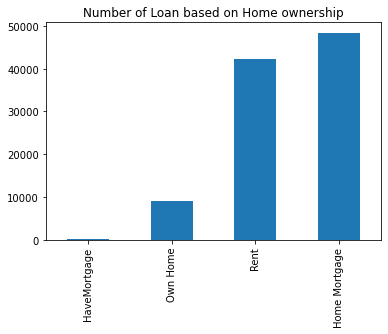

In [24]:
#Home Ownership Column   we are sorting the elements with values in ascending order. 
dataset['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

In [25]:
print(c(dataset['Home Ownership']))
dataset['Home Ownership'] =  le.fit_transform(dataset['Home Ownership'])
print(c(dataset['Home Ownership']))

Counter({'Home Mortgage': 48410, 'Rent': 42194, 'Own Home': 9182, 'HaveMortgage': 214})
Counter({1: 48410, 3: 42194, 2: 9182, 0: 214})


# Years in current job

In [26]:
dataset['Years in current job']=dataset['Years in current job'].str.extract(r"(\d+)")
dataset['Years in current job'] = dataset['Years in current job'].astype(float)

In [27]:
expmean = dataset['Years in current job'].mean()

In [28]:
dataset['Years in current job'].fillna(expmean, inplace=True)
dataset['Years in current job'].fillna(expmean, inplace=True)

In [29]:
dataset

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,1,1.167493e+06,8.000000,1,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,1,1.378277e+06,10.000000,1,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,2,2.231892e+06,8.000000,2,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,1,8.069490e+05,3.000000,2,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,1,1.378277e+06,5.000000,3,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,1,147070.0,0,1,4.754370e+05,7.000000,2,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,1,99999999.0,0,1,1.289416e+06,1.000000,3,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,1,103136.0,0,2,1.150545e+06,6.000000,3,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,1,530332.0,0,2,1.717524e+06,9.000000,3,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


# Dropping unwanted columns

In [30]:
dataset = dataset.drop(['Loan ID','Customer ID','Purpose'], axis=1)

# Credit Problems

In [31]:
#Normalizing 
dataset['Credit Problems'] = dataset['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [32]:
print(c(dataset['Credit Problems']))
dataset['Credit Problems'] = le.fit_transform(dataset['Credit Problems'])
print(c(dataset['Credit Problems']))

Counter({'No Credit Problem': 86035, 'Some Credit promblem': 13879, 'Major Credit Problems': 86})
Counter({1: 86035, 2: 13879, 0: 86})


# Credit Age


In [33]:
dataset['Credit Age'] = dataset['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 
                                else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [34]:
print(c(dataset['Credit Age']))
dataset['Credit Age'] = le.fit_transform(dataset['Credit Age'])
print(c(dataset['Credit Age']))

Counter({'Exceptional Credit Age': 49958, 'Good Credit Age': 49848, 'Short Credit Age': 194})
Counter({0: 49958, 1: 49848, 2: 194})


In [35]:
dataset = dataset.drop(['Months since last delinquent','Number of Open Accounts',
                  'Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

# Tax Liens

In [36]:
dataset['Tax Liens'] = dataset['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [37]:
print(c(dataset['Tax Liens']))
dataset['Tax Liens'] = le.fit_transform(dataset['Tax Liens'])
print(c(dataset['Tax Liens']))

Counter({'No Tax Lien': 98062, 'Some Tax Liens': 1717, 'Many Tax Liens': 221})
Counter({1: 98062, 2: 1717, 0: 221})


# Bankruptcies

In [38]:
dataset['Bankruptcies'] = dataset['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0  else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [39]:
print(c(dataset['Bankruptcies']))
dataset['Bankruptcies'] = le.fit_transform(dataset['Bankruptcies'])
print(c(dataset['Bankruptcies']))

Counter({'No bankruptcies': 88774, 'Some Bankruptcies': 10892, 'Many Bankruptcies': 334})
Counter({1: 88774, 2: 10892, 0: 334})


# Annual Income

In [40]:
meanxoutlier = dataset[dataset['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = dataset[dataset['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [41]:
dataset['Annual Income'] = dataset['Annual Income'].apply(lambda x: "Low Income" if x<=poorline  else ("Average Income" if x>poorline and x<richline else "High Income"))

In [42]:
print(c(dataset['Annual Income']))
dataset['Annual Income'] = le.fit_transform(dataset['Annual Income'])
print(c(dataset['Annual Income']))

Counter({'Average Income': 86004, 'High Income': 9145, 'Low Income': 4851})
Counter({0: 86004, 1: 9145, 2: 4851})


# Current Loan Amount

In [43]:
lmeanxoutlier = dataset[dataset['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = dataset[dataset['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126051.43019084871 498575.7655703696


In [44]:
dataset['Current Loan Amount'] = dataset['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [45]:
print(c(dataset['Current Loan Amount']))
dataset['Current Loan Amount'] = le.fit_transform(dataset['Current Loan Amount'])
print(c(dataset['Current Loan Amount']))

Counter({'Medium Loan': 60112, 'Big Loan': 26506, 'Small Loan': 13382})
Counter({1: 60112, 0: 26506, 2: 13382})


In [46]:
dataset.shape

(100000, 13)

# Seperating Dependent and Independent Columns

In [47]:
y = dataset['Loan Status']
X = dataset.drop(['Loan Status'],axis=1)

In [48]:
dataset.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Problems,Credit Age
0,1,1,0,1,0,8.0,1,17.2,1.0,2,1,2,0
1,1,1,0,1,0,10.0,1,21.1,0.0,1,1,1,0
2,1,0,0,2,1,8.0,2,14.9,1.0,1,1,2,1
3,1,1,1,1,0,3.0,2,12.0,0.0,1,1,1,1
4,1,1,0,1,0,5.0,3,6.1,0.0,1,1,1,1


# Performing Train and test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
#By using DecisionTree we are fitting the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [52]:
X_train.shape

(67000, 12)

In [53]:
y_pred_dt =dt.predict(X_test)  #prediction
c(y_pred_dt)

Counter({0: 6697, 1: 26303})

In [54]:
X_train[0]

array([ 0.21538779, -0.62204006, -0.25995262, -0.37673145, -1.15886448,
       -0.97633895, -0.59844981, -0.34869095, -0.33391075, -0.10969543,
       -0.39894497,  0.98973021])

In [55]:
X_test

array([[ 0.21538779, -0.62204006, -0.25995262, ..., -0.10969543,
        -0.39894497,  0.98973021],
       [ 0.21538779, -0.62204006, -0.25995262, ..., -0.10969543,
         2.47147096,  0.98973021],
       [ 0.21538779,  1.60761349, -2.34480128, ..., -0.10969543,
        -0.39894497,  0.98973021],
       ...,
       [ 1.83212341, -0.62204006, -0.25995262, ..., -0.10969543,
        -0.39894497,  0.98973021],
       [ 1.83212341, -0.62204006, -0.25995262, ..., -0.10969543,
        -0.39894497,  0.98973021],
       [ 0.21538779, -0.62204006, -0.25995262, ..., -0.10969543,
        -0.39894497, -0.99423114]])

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_pred_dt,y_test)

0.6928787878787879

In [58]:
!pip install ibm_watson_machine_learning

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [59]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                 "url":"https://eu-gb.ml.cloud.ibm.com",
                "apikey":"4OD49xnS3py5wOTVnzo7I_u8WmI7r_IWjd1RIwZUjdhg"
                }
client=APIClient(wml_credentials)

In [60]:
def guid_from_space_name(client, space_name):
    space= client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])

In [61]:
space_uid= guid_from_space_name(client, 'newspace')
print("Space UID=" +space_uid)

Space UID=6e93a1cb-8bfb-48fe-a8b5-1f110c6fade2


In [62]:
client.set.default_space(space_uid)

'SUCCESS'

In [63]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [64]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

'e4429883-c883-42b6-87a8-f419d64088cd'

In [65]:
 model_details = client.repository.store_model(model=dt,meta_props={
 client.repository.ModelMetaNames.NAME:"Loan_Prediction",
 client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23", 
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                        )
model_id = client.repository.get_model_uid(model_details)

In [66]:
model_id

'ef5275c9-b245-41be-929a-3584bce78024'

# Creating a pickle file dumping the model in it

In [67]:
 #importing the pickle file
import pickle 
#Dumping the model into the pickle file
pickle.dump(dt,open('loan.pkl','wb'))   